# Exploratory data analysis and visualizations: other metrics

In [DataExplorationI](DataExplorationI.ipynb) we answered the question, which tags get the most comments?  This notebook has additional analysis.

First we import the functions from DataExplorationI.  Functions are:

`time_elapsed` Input is a start time and an end time.  Output is a print statement with the time elapsed.

`with_commas` Input is a string containing semicolons.  Output is a list with the semicolons replaced by commas.

`attr` Input is a post type, author, or tag.  Out put is one of the strings "Post type", "Author(s)", or "Tags".

`attribute_features` Input is one of the strings "Post type", "Author(s)", or "Tags".  Output is all of the features with that attribute.

`frequency_of_features` Input is a list of features from the attributes "Post type", "Author(s)", or "Tags".  Output is a data frame with each feature and the frequency with which it appears in the data frame raw_data.

`comments_analysis` Input is one of the strings "Post type", "Author(s)", or "Tags".  Output is a data frame with features, frequency, total number of comments, average number of comments, and median number of comments.

`prune` Input is a set of features from "Post type", "Author(s)", or "Tags" and a sublist of features to be removed.  Output is the remaining features.

`most_used` Input is a list of features.  Output is the sublist of features that appear in the data at lease 2% of the time.

`PCA_input` Input is a list of features.  Output is a data frame whose rows are post titles and whose columns are the features.

After that, we import the other modules we'll need, then the data.  There were no duplicates when we checked in DataExplorationI, so we just load the data.

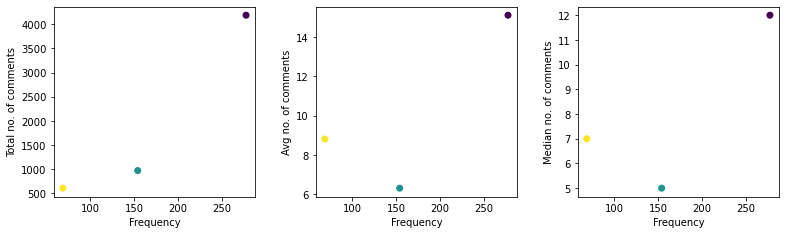

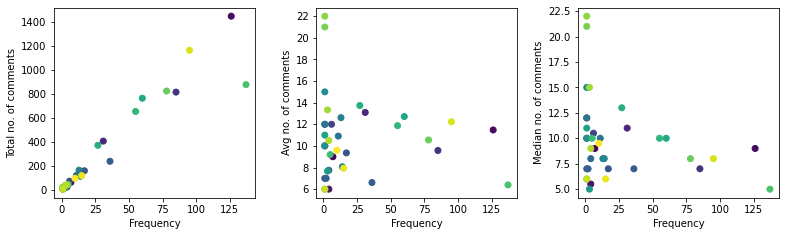

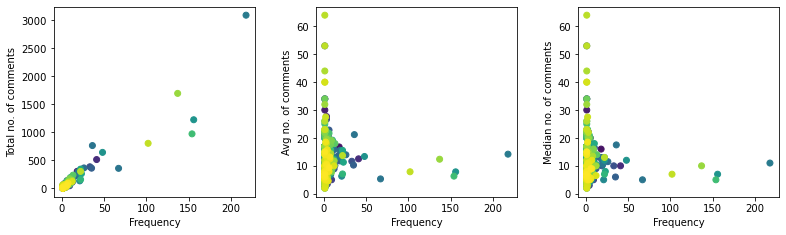

Final tags are ['2022 Senate Elections', 'Abortion', 'Democrats', 'Jan. 6 Investigation', 'Politics', 'Ron DeSantis', 'Pollapalooza', 'Do You Buy That', '2022 In Review', 'House of Representatives', '2022 House Elections', 'The Biden Administration', 'Polling', 'State Legislatures', 'Polls', 'Congress', 'Senate', 'Election Deniers', 'Election Update', '2024 Presidential Election', '2022 Election', 'Republicans', 'Georgia Senate Runoff', 'Model Talk', 'Donald Trump', 'Joe Biden', 'Election Deniers On The Ballot', '2024 Election', '2022 Primaries', 'Slack Chat', 'Supreme Court', 'Public Opinion', '2022 Governors Elections', 'Georgia Senate', 'Inflation', 'Economy', 'Presidential Approval', '2022 Midterms', 'Kevin McCarthy', '2024 Republican Primary', 'Georgia'].  There are 41 of them.
There are 494 total tags.


In [1]:
from DataExplorationI import time_elapsed, with_commas, attr, attribute_features, frequency_of_features, comments_analysis, prune, most_used, PCA_input
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time 
raw_data = pd.read_csv("ProblemStatementOutputs/1026_03-05-2023_14-56-41.csv")

## PCA on authors vs. tags

In [2]:
# Make a matrix with authors vs. tags
start = time.time() # for debugging
authors = attribute_features("Author(s)")
tags = attribute_features("Tags")
matrix_rows = []
for author in authors:
    author_tags_list = [author]
    for tag in tags:
        tag_count = 0
        for index, row in raw_data.iterrows():
            authors_with_commas = with_commas(row["Author(s)"])
            if author in authors_with_commas:
                tags_with_commas = with_commas(row["Tags"])
                if tag in tags_with_commas:
                    tag_count = tag_count + 1             
        author_tags_list.append(tag_count)
    matrix_rows.append(author_tags_list) 
end = time.time() # for debugging
time_elapsed(start,end) # for debugging
authors_vs_tags_matrix = pd.DataFrame(matrix_rows, columns = [["Author"]+tags])  
authors_vs_tags_matrix

Total time elapsed = 14.703050239880879 minutes


,Author,California Politics,The Big Lie,Ipsos,Mass Shootings,American Turning Point,GOP Retirements,Government Spending,Polling Industry,ChatGPT,...,Congressional Hearings,Gun Violence,Governors,Jon Ossoff,Voting Rights,Gay Rights,Michigan Politics,Agriculture,Sean McElwee,China
0,Tony Chow,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Nathaniel Rakich,1,4,2,1,0,1,1,0,0,...,0,1,2,0,4,0,0,0,0,0
2,Chadwick Matlin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Laura Bronner,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Monica Potts,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,2
5,Amelia Thomson-DeVeaux,0,0,1,0,0,0,0,0,1,...,1,1,2,0,1,0,0,0,0,0
6,Bernard Mendez,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Meredith Conroy,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,Curtis Yee,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Sarah Frostenson,0,1,2,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [3]:
# Do PCA on authors v. tags
# Make the PCA objects
scaler = StandardScaler()
pca = PCA()

# Fit the PCA
features_scaled = scaler.fit_transform(matrix[matrix.columns[1:]])
pca.fit(features_scaled)

# Get the PCA components
component_vectors_authors = pd.DataFrame(pca.components_.transpose(), index = authors_vs_tags_matrix.columns[1:])
component_vectors_authors.sort_values(by = component_vectors.columns[0], ascending = False)

NameError: name 'matrix' is not defined

## Network of authors

We use the library `networkx` to build a network of authors, showing collaborations.

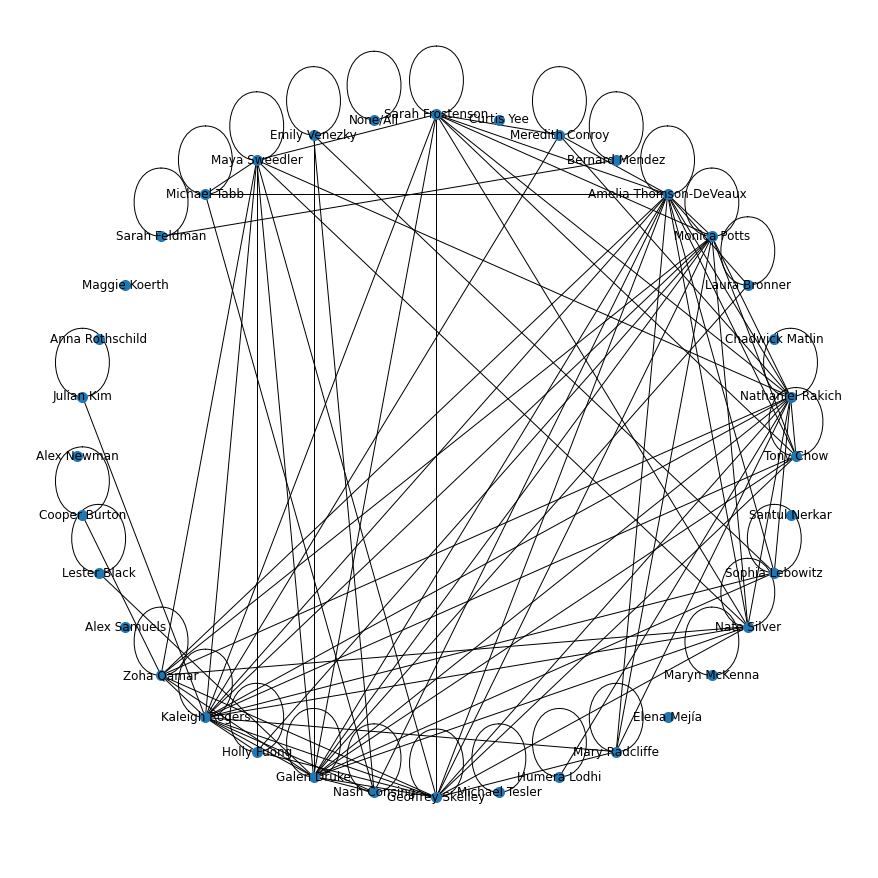

In [4]:
import networkx as nx

authors = attribute_features("Author(s)")

# Create the graph and add the nodes
G = nx.Graph()
G.add_nodes_from(authors)

# Create the adjacency matrix of collaborations
#start_adjacency_matrix = time.time() # for debugging
adjacency_matrix_entries = np.zeros([len(authors),len(authors)])
#print(adjacency_matrix_entries) # for debugging
for i in range(len(authors)):
    for j in range(len(authors)):
        if i <= j:
            collaborations = 0
            #print("Type of collaborations variable is:", type(collaborations)) # for debugging
            for entry in raw_data["Author(s)"]:
                entry_with_commas = with_commas(entry)
                if all(x in entry_with_commas for x in [authors[i], authors[j]]):
                    collaborations = collaborations + 1
                    #print("Type of collaborations variable is:", type(collaborations)) # for debugging
            #print(str(authors[i])+" and "+str(authors[j])+" have "+str(collaborations)+" collaborations.") # for debugging
        #print("Type of collaborations variable is:", type(collaborations)) # for debugging
        if collaborations > 0:
            G.add_edge(authors[i],authors[j], weight = collaborations)
            adjacency_matrix_entries[i,j] = adjacency_matrix_entries[j,i] = int(collaborations)
adjacency_matrix = pd.DataFrame(adjacency_matrix_entries, index = authors, columns = authors)  
#end_adjacency_matrix = time.time() # for debugging
#time_elapsed(start_adjacency_matrix,end_adjacency_matrix) # for debugging        
#adjacency_matrix # for debugging
#frequency_of_features(authors) # for debugging

#G = nx.from_pandas_dataframe(adjacency_matrix)#, create_using=nx.DiGraph)
plt.figure(1,figsize=(12,12))
#layout = nx.spring_layout(G)
nx.draw_circular(G, node_size=100, with_labels=True)#, font_weight='bold', font_size=15)
# labels = nx.get_edge_attributes(G,'weight')
# nx.draw_networkx_edge_labels(G,pos=layout,edge_labels=labels)
plt.show()
